The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.
the objective is to build a ML model that predict the patients status.

**Loading dataset and Data exploratory**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Reading dataset and showing the first 5 rows
df = pd.read_csv('diabetes_prediction.csv', delimiter=';')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#Showing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#showing our dataset shape (rows number , columns number)
df.shape

(100000, 9)

In [ ]:
#Before encoding we want to see the unique values in the columns to encode
print(df['gender'].unique())
print(df['smoking_history'].unique())

['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Applying the label encoder
df_encoded = df.copy()
le_gender = LabelEncoder()
le_gender.fit(['Male','Female','Other'])
df_encoded['gender'] = le_gender.transform(df_encoded['gender'])
le_smoking_history = LabelEncoder()
le_smoking_history.fit(['never','No Info','current','ever','former','not current'])
df_encoded['smoking_history'] = le_smoking_history.transform(df_encoded['smoking_history'])
df_encoded.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Train and test spliting

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']]
Y = df_encoded['diabetes']
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

**Decision tree modelisation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
df_tree= DecisionTreeClassifier(criterion="entropy")
df_tree.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy')

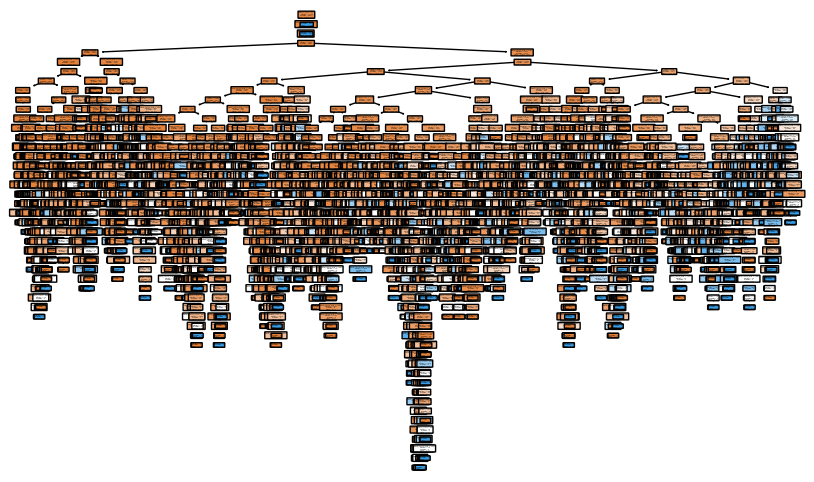

In [ ]:
#Plotting the decision tree
plt.figure(figsize=(10,6))
tree.plot_tree(df_tree,feature_names=list(df.columns),filled=True , rounded=True)
plt.show()

Decision tree performance evaluation

In [ ]:
yhat=df_tree.predict(X_test)
accuracy = accuracy_score(Y_test,yhat)
confusion = confusion_matrix(Y_test,yhat)
report = classification_report(Y_test,yhat)
print(f'Model accuracy : {accuracy:.4f}')
print('\nClassification report :\n', report)
print('\nConfusion matrix :\n', confusion)

Model accuracy : 0.9536

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.72      0.75      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


Confusion matrix :
 [[17794   498]
 [  429  1279]]


**Bayesian network modelisation**

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator

In [ ]:
model = BayesianModel([('gender', 'diabetes'),
                       ('age', 'diabetes'),
                       ('hypertension', 'diabetes'),
                       ('heart_disease', 'diabetes'),
                       ('smoking_history', 'diabetes'),
                       ('bmi', 'diabetes'),
                       ('HbA1c_level', 'diabetes'),
                       ('blood_glucose_level', 'diabetes')])

df_sample = df.sample(frac=0.0005 , random_state=42)
train_data, test_data = train_test_split(df_sample, test_size=0.2, random_state=42)
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

In [ ]:
print("Paramètres estimés sur l'ensemble d'entraînement:")
print(model.get_cpds())

Paramètres estimés sur l'ensemble d'entraînement:
[<TabularCPD representing P(gender:2) at 0x1ce4d3814d0>, <TabularCPD representing P(diabetes:2 | HbA1c_level:12, age:33, blood_glucose_level:11, bmi:31, gender:2, heart_disease:2, hypertension:2, smoking_history:6) at 0x1ce4d3822d0>, <TabularCPD representing P(age:33) at 0x1ce4d36f010>, <TabularCPD representing P(hypertension:2) at 0x1ce4d3892d0>, <TabularCPD representing P(heart_disease:2) at 0x1ce4d389c90>, <TabularCPD representing P(smoking_history:6) at 0x1ce4d389e90>, <TabularCPD representing P(bmi:31) at 0x1ce4d38a050>, <TabularCPD representing P(HbA1c_level:12) at 0x1ce4d38a210>, <TabularCPD representing P(blood_glucose_level:11) at 0x1ce4d38a3d0>]


In [ ]:
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Créer l'objet d'inférence
inference = VariableElimination(model)

# Faire des prédictions sur l'ensemble de test
predictions = pd.DataFrame()
for index, row in test_data.iterrows():
    query = inference.map_query(variables=['diabetes'])
    predictions = predictions.append(query, ignore_index=True)

# Comparer les prédictions avec les valeurs réelles dans l'ensemble de test
accuracy = accuracy_score(test_data['diabetes'], predictions['diabetes'])
print("Précision du modèle sur l'ensemble de test:", accuracy)

# Matrice de confusion
cm = confusion_matrix(test_data['diabetes'], predictions['diabetes'])
print("Matrice de confusion:")
print(cm)

# Rapport de classification
report = classification_report(test_data['diabetes'], predictions['diabetes'])
print("Rapport de classification:")
print(report)


Eliminating: HbA1c_level: 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]        
C:\Users\User\AppData\Local\Temp\ipykernel_15172\1227244485.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)
Eliminating: HbA1c_level: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]        
C:\Users\User\AppData\Local\Temp\ipykernel_15172\1227244485.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)
Eliminating: HbA1c_level: 100%|██████████| 8/8 [00:01<00:00,  5.91it/s]        
C:\Users\User\AppData\Local\Temp\ipykernel_15172\1227244485.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(que

Précision du modèle sur l'ensemble de test: 0.9
Matrice de confusion:
[[9 0]
 [1 0]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

**Modélisation avec la Programmation par Contrainte**

In [ ]:
pip install python-constraint

  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24057 sha256=266cb4b37553754317c7ffff9d5471017c9e78c5dd3ebc6955bf4d27bdbdaec3
  Stored in directory: /root/.cache/pip/wheels/2e/f2/2b/cb08b5fe129e4f69b7033061f256e5c551b0aa1160c2872aee
Successfully built python-constraint


In [ ]:
from constraint import Problem


# Define the constraint function
def age_and_blood_glucose_constraint( age, blood_glucose_level):
    return age < 60 and blood_glucose_level > 120

# Create a constraint problem
problem = Problem()

# Add variables to the problem (matching your dataset attributes)
problem.addVariable('age', np.arange(0,80))
problem.addVariable('blood_glucose_level', range(300))

# Add the constraint function to the problem
problem.addConstraint(age_and_blood_glucose_constraint, [ 'age',  'blood_glucose_level'])

# Find solutions that satisfy the constraint
solutions = problem.getSolutions()

In [ ]:
# Initialize an empty DataFrame to store the filtered results
filtered_df = pd.DataFrame()

# Loop through all solutions
for solution in solutions:
    # Extract values for 'age' and 'blood_glucose_level'
    age_value = solution['age']
    blood_glucose_value = solution['blood_glucose_level']

    # Filter the original DataFrame based on the obtained values
    temp_df = df[(df['age'] == age_value) & (df['blood_glucose_level'] == blood_glucose_value)]

    # Concatenate the filtered DataFrame to the results
    filtered_df = pd.concat([filtered_df, temp_df])

# Display the resulting DataFrame
filtered_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2614,Female,59.0,0,0,never,27.32,8.8,280,1
2726,Male,59.0,0,0,never,24.95,8.8,280,1
3629,Female,59.0,0,0,ever,33.41,9.0,280,1
5159,Male,59.0,0,1,former,39.17,5.8,280,1
5662,Male,59.0,0,0,former,27.32,6.6,280,1
...,...,...,...,...,...,...,...,...,...
36203,Male,1.0,0,0,No Info,27.32,5.7,126,0
53170,Female,1.0,0,0,No Info,19.07,4.8,126,0
56610,Male,1.0,0,0,No Info,19.85,6.1,126,0
94691,Male,1.0,0,0,No Info,18.42,6.2,126,0


## **Intégration des contraintes dans les modèles de classification**

**Arbre de décision avec contraintes**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
filtered_df_encoded = filtered_df.copy()
le_gender = LabelEncoder()
le_gender.fit(['Male','Female','Other'])
filtered_df_encoded['gender'] = le_gender.transform(filtered_df_encoded['gender'])
le_smoking_history = LabelEncoder()
le_smoking_history.fit(['never','No Info','current','ever','former','not current'])
filtered_df_encoded['smoking_history'] = le_smoking_history.transform(filtered_df_encoded['smoking_history'])
filtered_df_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2614,0,59.0,0,0,4,27.32,8.8,280,1
2726,1,59.0,0,0,4,24.95,8.8,280,1
3629,0,59.0,0,0,2,33.41,9.0,280,1
5159,1,59.0,0,1,3,39.17,5.8,280,1
5662,1,59.0,0,0,3,27.32,6.6,280,1


In [ ]:
X =filtered_df_encoded[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']]
Y = filtered_df_encoded['diabetes']
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [ ]:
filtered_df_tree= DecisionTreeClassifier(criterion="entropy")
filtered_df_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

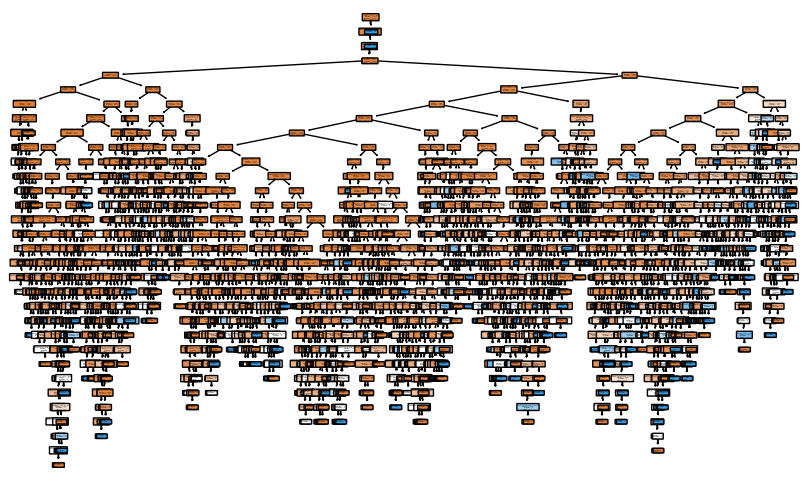

In [ ]:
#Plotting the decision tree
plt.figure(figsize=(10,6))
tree.plot_tree(filtered_df_tree,feature_names=list(filtered_df.columns),filled=True , rounded=True)
plt.show()

In [ ]:
filtered_yhat=filtered_df_tree.predict(X_test)
accuracy = accuracy_score(Y_test,filtered_yhat)
confusion = confusion_matrix(Y_test,filtered_yhat)
report = classification_report(Y_test,filtered_yhat)
print(f'Model accuracy : {accuracy:.4f}')
print('\nClassification report :\n', report)
print('\nConfusion matrix :\n', confusion)

Model accuracy : 0.9562

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      9601
           1       0.65      0.69      0.67       657

    accuracy                           0.96     10258
   macro avg       0.81      0.83      0.82     10258
weighted avg       0.96      0.96      0.96     10258


Confusion matrix :
 [[9357  244]
 [ 205  452]]


**Réseau bayésien avec contrainte**

In [ ]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator

In [ ]:
model = BayesianModel([('gender', 'diabetes'),
                       ('age', 'diabetes'),
                       ('hypertension', 'diabetes'),
                       ('heart_disease', 'diabetes'),
                       ('smoking_history', 'diabetes'),
                       ('bmi', 'diabetes'),
                       ('HbA1c_level', 'diabetes'),
                       ('blood_glucose_level', 'diabetes')])

filtered_df_sample = filtered_df.sample(frac=0.0005 , random_state=42)
train_data, test_data = train_test_split(filtered_df_sample, test_size=0.2, random_state=42)
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

In [ ]:
print("Paramètres estimés sur l'ensemble d'entraînement:")
print(model.get_cpds())

Paramètres estimés sur l'ensemble d'entraînement:
[<TabularCPD representing P(gender:2) at 0x7f7fdbcc2c20>, <TabularCPD representing P(diabetes:2 | HbA1c_level:10, age:16, blood_glucose_level:7, bmi:15, gender:2, heart_disease:1, hypertension:2, smoking_history:6) at 0x7f7fe54cd450>, <TabularCPD representing P(age:16) at 0x7f7f4393c1c0>, <TabularCPD representing P(hypertension:2) at 0x7f7f42c4ece0>, <TabularCPD representing P(heart_disease:1) at 0x7f7f42c4e2c0>, <TabularCPD representing P(smoking_history:6) at 0x7f7f42c4e350>, <TabularCPD representing P(bmi:15) at 0x7f7f42c4ead0>, <TabularCPD representing P(HbA1c_level:10) at 0x7f7f42c4ec80>, <TabularCPD representing P(blood_glucose_level:7) at 0x7f7f42c4e7d0>]


In [ ]:
from pgmpy.inference import VariableElimination
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Créer l'objet d'inférence
inference = VariableElimination(model)

# Faire des prédictions sur l'ensemble de test
predictions = pd.DataFrame()
for index, row in test_data.iterrows():
    query = inference.map_query(variables=['diabetes'])
    predictions = predictions.append(query, ignore_index=True)

# Comparer les prédictions avec les valeurs réelles dans l'ensemble de test
accuracy = accuracy_score(test_data['diabetes'], predictions['diabetes'])
print("Précision du modèle sur l'ensemble de test:", accuracy)

# Matrice de confusion
cm = confusion_matrix(test_data['diabetes'], predictions['diabetes'])
print("Matrice de confusion:")
print(cm)

# Rapport de classification
report = classification_report(test_data['diabetes'], predictions['diabetes'])
print("Rapport de classification:")
print(report)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<ipython-input-20-74d81c888ec1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<ipython-input-20-74d81c888ec1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<ipython-input-20-74d81c888ec1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<ipython-input-20-74d81c888ec1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<ipython-input-20-74d81c888ec1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Précision du modèle sur l'ensemble de test: 1.0
Matrice de confusion:
[[6]]
Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



<ipython-input-20-74d81c888ec1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(query, ignore_index=True)
